<a href="https://colab.research.google.com/github/ccwu0918/yolov7-colab/blob/main/2022_12_31_ChatGPT%E5%BF%AB%E9%96%83%E5%88%86%E4%BA%AB%E6%9C%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 KB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.0-py3-none-any.whl size=66855 sha256=36b81f592218c6e5fa04184c245bbcfccec48ea70be65a7c83550effb320b2b9
  Stored in directory: /root/.cache/pip/wheels/7e/4c/c8/31e9d441bd937e2b9076627465f9db43ab6db40f08aae60b66
Successfully built openai




1. 登入 https://beta.openai.com/account/api-keys
2. 點選右上角帳號 --> View API Keys
3. 點選「+Create new secret key」產生一組API Key
4. 複制「API Key Generated」下方的API Keys
5. 


In [2]:
# 開發第一個ChatGPT程式
import openai

openai.api_key = "修改成您自己的OpenAI API Key" # 例如：openai.api_key = "sk-L19C7QbdzGfSqHLoxZZbT3****FJhAyr1yQzD6ZmGrY0eVQM"
response = openai.Completion.create(
  model="text-davinci-003",
  prompt="請問Python有哪幾種基本的資料型態？",
  temperature=0,
  max_tokens=500,
  top_p=1,
  frequency_penalty=0.5,
  presence_penalty=0
)

In [3]:
response

<OpenAIObject text_completion id=cmpl-6VxtaX03eiJLWqQAcLSGdIQvyvnDs at 0x7f331154ac70> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nPython\u6709\u4ee5\u4e0b\u5e7e\u7a2e\u57fa\u672c\u7684\u8cc7\u6599\u578b\u614b\uff1a\n\n1. \u6578\u5b57 (Number)\uff1a\u6574\u6578 (int)\u3001\u6d6e\u9ede\u6578 (float)\u3001\u8907\u6578 (complex)\n2. \u5b57\u4e32 (String)\n3. \u5217\u8868 (List)\n4. \u5143\u7d44 (Tuple)\n5. \u96c6\u5408 (Set)\n6. \u5b57\u5178 (Dictionary)"
    }
  ],
  "created": 1673076426,
  "id": "cmpl-6VxtaX03eiJLWqQAcLSGdIQvyvnDs",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 133,
    "prompt_tokens": 36,
    "total_tokens": 169
  }
}

In [4]:
print(response["choices"][0]["text"].strip())

Python有以下幾種基本的資料型態：

1. 數字 (Number)：整數 (int)、浮點數 (float)、複數 (complex)
2. 字串 (String)
3. 列表 (List)
4. 元組 (Tuple)
5. 集合 (Set)
6. 字典 (Dictionary)


In [5]:
# ChatGPT簡易聊天程式
import openai
openai.api_key = "修改成您自己的OpenAI API Key" # 例如：openai.api_key = "sk-L19C7QbdzGfSqHLoxZZbT3****FJhAyr1yQzD6ZmGrY0eVQM"

Question = input("請輸入您的問題：")

if Question != "":
    response = openai.Completion.create(
    model="text-davinci-003",
    prompt=Question,
    temperature=0,
    max_tokens=500,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0
    )
    # 顯示答案
    print(response["choices"][0]["text"].strip())

請輸入您的問題：2023新年賀詞
新年快樂！祝你在新的一年里身體健康，事業興隆，家庭和睦，生活美滿！


In [8]:
# 製作ChatGPT自訂函式
def askchatgpt(Question):
    response = openai.Completion.create(
    model="text-davinci-003",
    prompt=Question,
    temperature=0,
    max_tokens=500,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0
    )
    # 返回答案
    return response["choices"][0]["text"].strip()

In [9]:
Question = input("請輸入您的問題：")
print(askchatgpt(Question))

請輸入您的問題：何謂人工智慧？
人工智慧（AI）是一種計算機科學的分支，旨在建立智能機器，使其能夠像人類一樣思考、行動和學習。它的目標是使電腦具有能力去理解世界、自我學習、思考和行動，以及對新事物作出反應。


In [10]:
# 製作有使用介面的聊天機器人：Gradio
!pip install gradio

#create interface object
import gradio as gr
gui = gr.Interface(fn=askchatgpt, #callable function
                   inputs="text", #input format
                   outputs="text") #output format
#display the interface
gui.launch(share=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.6/270.6 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [11]:
!pip install qrcode Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40400 sha256=dd16d39408cedf3e674d1687ea315e9e8f45657afb1eac42f2d14c178f456df4
  Stored in directory: /root/.cache/pip/wheels/35/fd/04/2768886c56207acee0d6dc6b9bd5d06dac63a810f0c0a42516
Successfully built qrcode


<class 'qrcode.image.pil.PilImage'>


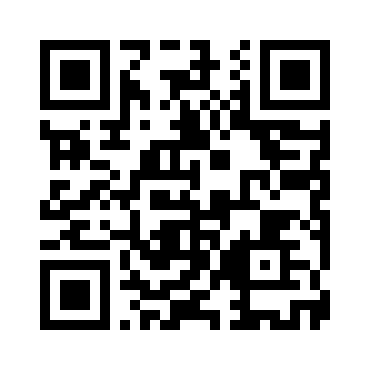

In [15]:
import qrcode
from google.colab.patches import cv2_imshow
import cv2
img = qrcode.make('https://dbc857e1-de8f-46c3.gradio.live')
print(type(img))  # qrcode.image.pil.PilImage
img.save("qrcode_1.png")
gray = cv2.imread("qrcode_1.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(gray)